# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Results
In this exercise data from citipy was compared to weather data called from the Open Weather Map API. We used this data to compare latitude (ie distance from the equator) to various weather phenomenon. From this we learned that, as expected through common knowledge, as we moved closer to the equator in both the northern and southern hemispheres, the temperature increases. <br>
We also established that humidity is not necessarily at its highest at the equator. While in both hemispheres, heading north will show an increase in humidity. <br>
Other factors like wind speed and cloudiness showed little in the way of relation depending on latitude. <br>
<br> An issue that may effect these results is that although we used a random sample of latitudes and longitudes, there is nearly twice as many cities in the Northern Hemisphere. This may be because the global north is more heavily citied, or an issue with our dataset.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress


# Import API key
from api_keys import api_key
temp_units = "metric"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# create list for latitudes and longitudes
lat_lngs = []
cities = []

# use random to generate a bunch of latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# get the nearest city from these values
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# only unique cities are used
    if city not in cities:
        cities.append(city)

# check if we have enough cities
len(cities)


582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Checking weather {count_one} of Set {set_one} | {city}")
    except Exception:
        print(f"{city} not found. Next...")
print("------------------------------")
print("All Done!")
print("------------------------------")    

Checking weather 1 of Set 1 | mataura
tumannyy not found. Next...
tay ninh not found. Next...
Checking weather 2 of Set 1 | kodiak
Checking weather 3 of Set 1 | torbay
Checking weather 4 of Set 1 | puerto ayora
Checking weather 5 of Set 1 | tiksi
Checking weather 6 of Set 1 | sao filipe
Checking weather 7 of Set 1 | hobyo
Checking weather 8 of Set 1 | barrow
Checking weather 9 of Set 1 | bengkulu
Checking weather 10 of Set 1 | thompson
Checking weather 11 of Set 1 | busselton
Checking weather 12 of Set 1 | ushuaia
barentsburg not found. Next...
Checking weather 13 of Set 1 | mweka
Checking weather 14 of Set 1 | new norfolk
Checking weather 15 of Set 1 | samarai
Checking weather 16 of Set 1 | banjarmasin
Checking weather 17 of Set 1 | albany
Checking weather 18 of Set 1 | hamilton
meyungs not found. Next...
Checking weather 19 of Set 1 | auki
Checking weather 20 of Set 1 | vaini
Checking weather 21 of Set 1 | ndioum
Checking weather 22 of Set 1 | karratha
Checking weather 23 of Set 1 | 

Checking weather 45 of Set 4 | kampot
Checking weather 46 of Set 4 | anadyr
Checking weather 47 of Set 4 | alta floresta
Checking weather 48 of Set 4 | pontianak
Checking weather 49 of Set 4 | wattegama
Checking weather 1 of Set 5 | ponta do sol
Checking weather 2 of Set 5 | santa rosa
Checking weather 3 of Set 5 | hailey
Checking weather 4 of Set 5 | gravdal
Checking weather 5 of Set 5 | okhotsk
Checking weather 6 of Set 5 | pathein
Checking weather 7 of Set 5 | urengoy
Checking weather 8 of Set 5 | petropavlovsk-kamchatskiy
Checking weather 9 of Set 5 | koygorodok
chiang khong not found. Next...
Checking weather 10 of Set 5 | sedkyrkeshch
Checking weather 11 of Set 5 | motygino
la ronge not found. Next...
amderma not found. Next...
Checking weather 12 of Set 5 | codrington
Checking weather 13 of Set 5 | namatanai
Checking weather 14 of Set 5 | letka
Checking weather 15 of Set 5 | singkang
Checking weather 16 of Set 5 | sinnamary
Checking weather 17 of Set 5 | tailai
Checking weather 

Checking weather 39 of Set 8 | sijunjung
Checking weather 40 of Set 8 | krasnoselkup
Checking weather 41 of Set 8 | gushikawa
Checking weather 42 of Set 8 | rumuruti
Checking weather 43 of Set 8 | mecca
Checking weather 44 of Set 8 | riverton
Checking weather 45 of Set 8 | rylsk
Checking weather 46 of Set 8 | lindi
Checking weather 47 of Set 8 | onega
samusu not found. Next...
Checking weather 48 of Set 8 | yatou
Checking weather 49 of Set 8 | monrovia
Checking weather 1 of Set 9 | sakakah
Checking weather 2 of Set 9 | gamboma
Checking weather 3 of Set 9 | sorland
Checking weather 4 of Set 9 | tonantins
Checking weather 5 of Set 9 | santa cruz de la palma
Checking weather 6 of Set 9 | xuddur
Checking weather 7 of Set 9 | choix
Checking weather 8 of Set 9 | svetlaya
Checking weather 9 of Set 9 | lompoc
Checking weather 10 of Set 9 | solnechnyy
Checking weather 11 of Set 9 | valle de allende
Checking weather 12 of Set 9 | huarmey
Checking weather 13 of Set 9 | myaundzha
Checking weather 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for dataframe to reference
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
# create dataframe
weather_df = pd.DataFrame(weather_dict)

# check
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,99,NZ,1643614523,78,-46.1927,168.8643,18.04,0.63
1,kodiak,0,US,1643614524,79,57.7900,-152.4072,-7.27,3.60
2,torbay,87,CA,1643614524,83,47.6666,-52.7314,1.99,2.68
3,puerto ayora,0,ES,1643614525,68,36.5939,-6.2330,6.81,2.06
4,tiksi,100,RU,1643614525,98,71.6872,128.8694,-24.06,1.68


In [5]:
#output to csv
weather_df.to_csv('weather_df.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df['Humidity'].sort_values(ascending = False)
#This indicates that some cities in our list have a humidity of 100% but not over it. 
#A little research indicates that humidity levels over 100% are only really possible at very high altitudes, making it pretty unlikely for there to be cities built.

481    100
349    100
302    100
203    100
422    100
      ... 
20      13
451     13
131     13
242     13
345     12
Name: Humidity, Length: 528, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

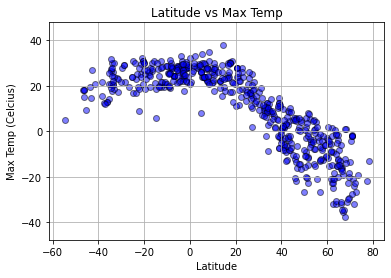

In [7]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],color  = 'blue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.title("Latitude vs Max Temp")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celcius)')
plt.ylim (min(weather_df['Max Temp'])-10, max(weather_df['Max Temp']) + 10)
plt.savefig('fig1.png')
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

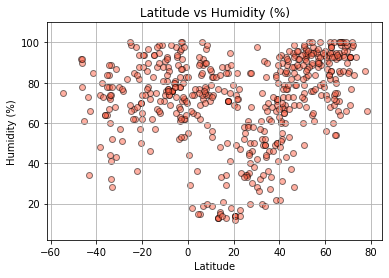

In [8]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'],color  = 'tomato', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.title("Latitude vs Humidity (%)")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim (min(weather_df['Humidity'])-10, max(weather_df['Humidity']) + 10)
plt.savefig('fig2.png')
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

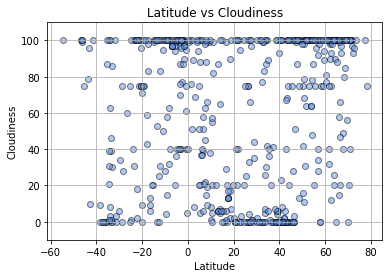

In [9]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.title("Latitude vs Cloudiness")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim (min(weather_df['Cloudiness'])-10, max(weather_df['Cloudiness']) + 10)
plt.savefig('fig3.png')
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

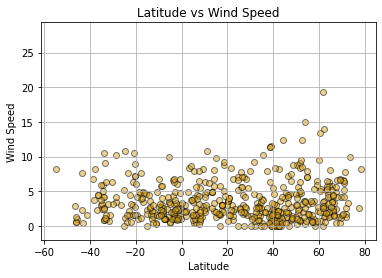

In [10]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],color  = 'goldenrod', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.title("Latitude vs Wind Speed")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim (min(weather_df['Wind Speed'])-2, max(weather_df['Wind Speed']) + 10)
plt.savefig('fig4.png')
plt.show

## Linear Regression

In [28]:
#split the data into northern and southern hemispheres
north_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
south_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]
#compare sample sizees
size_north = (len(north_df))
size_south = (len(south_df))
print(size_north)
print(size_south)

366
162


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.74x + 33.07
The r-squared is: -0.8870950286596015
There is a negative correlation.
The closer you are to be equator in the Northern Hemisphere, the warmer it is.


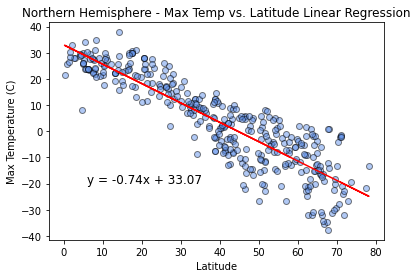

<Figure size 432x288 with 0 Axes>

In [27]:
#set variables
x_val = north_df['Lat']
y_val = north_df['Max Temp']

#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(6,-20),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a negative correlation.")
print("The closer you are to be equator in the Northern Hemisphere, the warmer it is.")
plt.show()
plt.savefig('fig5.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 27.15
The r-squared is: 0.4513634808172364
There is a positive correlation.
The closer you are to the equator in the Southern Hemisphere, the warmer it is.


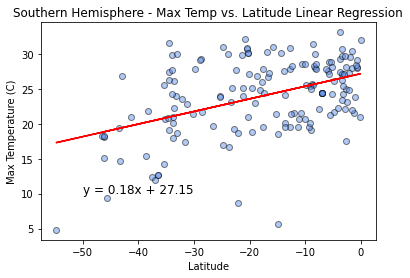

<Figure size 432x288 with 0 Axes>

In [14]:
#set variables
x_val = south_df['Lat']
y_val = south_df['Max Temp']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(-50,10),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a positive correlation.")
print("The closer you are to the equator in the Southern Hemisphere, the warmer it is.")
plt.show()
plt.savefig('fig6.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.54x + 49.47
The r-squared is: 0.4647276932297988
There is a positive correlation.
Moving away from the equator in the northern hemisphere sees an increase in humidity.


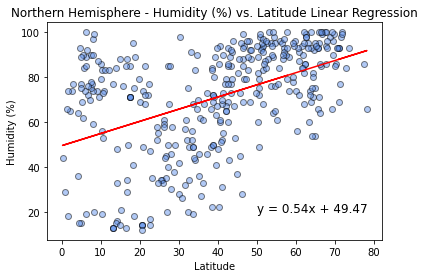

<Figure size 432x288 with 0 Axes>

In [15]:
#set variables
x_val = north_df['Lat']
y_val = north_df['Humidity']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(50,20),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a positive correlation.")
print("Moving away from the equator in the northern hemisphere sees an increase in humidity.")
plt.show()
plt.savefig('fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.24x + 79.76
The r-squared is: 0.21251745589383142
There is a weak positive correlation.
Moving toward the equator in the sounthern hemisphere does increase humidity, but not by very much


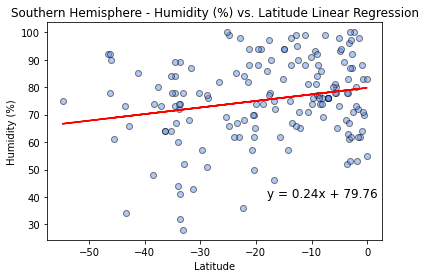

<Figure size 432x288 with 0 Axes>

In [16]:
x_val = south_df['Lat']
y_val = south_df['Humidity']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(-18,40),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a weak positive correlation.")
print("Moving toward the equator in the sounthern hemisphere does increase humidity, but not by very much")
plt.show()
plt.savefig('fig8.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.66x + 29.85
The r-squared is: 0.32123777310781665
There is a weak positive correlation.
Moving away from the equator in the northern hemisphere does increase cloudiness, however there the correlation is not strong.


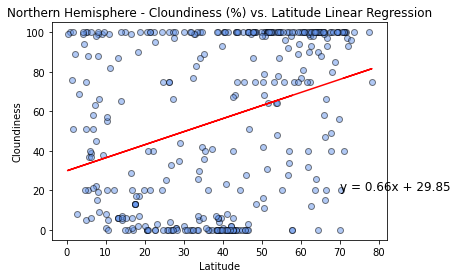

<Figure size 432x288 with 0 Axes>

In [18]:
x_val = north_df['Lat']
y_val = north_df['Cloudiness']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(70,20),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloundiness')
plt.title('Northern Hemisphere - Cloundiness (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a weak positive correlation.")
print("Moving away from the equator in the northern hemisphere does increase cloudiness, however there the correlation is not strong.")
plt.show()
plt.savefig('fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.91x + 81.17
The r-squared is: 0.31442399614129873
There is a positive correlation.
Moving toward the equator in the northern hemisphere does increase cloudiness, however the correlation is not strong.


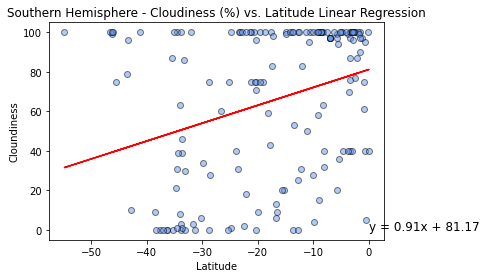

<Figure size 432x288 with 0 Axes>

In [20]:
x_val = south_df['Lat']
y_val = south_df['Cloudiness']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(0,0),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloundiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a positive correlation.")
print("Moving toward the equator in the northern hemisphere does increase cloudiness, however the correlation is not strong.")
plt.show()
plt.savefig('fig10.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 3.24
The r-squared is: 0.04943991975653568
There is a weak positive correlation.
Moving away from the equator in the northern hemisphere does increase windiness, but not by very much


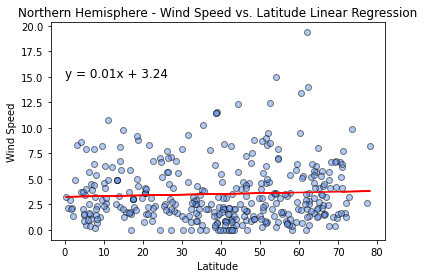

<Figure size 432x288 with 0 Axes>

In [21]:
x_val = north_df['Lat']
y_val = north_df['Wind Speed']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(0,15),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a weak positive correlation.")
print("Moving away from the equator in the northern hemisphere does increase windiness, but there is only just a positive correlation.")
plt.show()
plt.savefig('fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 2.68
The r-squared is: -0.17631553913799772
There is a weak negative correlation.
Moving toward the equator in the southern hemisphere does decrease wind speed, but not by very much.


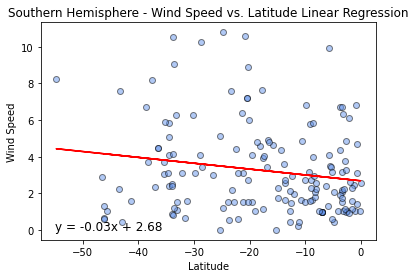

<Figure size 432x288 with 0 Axes>

In [23]:
x_val = south_df['Lat']
y_val = south_df['Wind Speed']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(-55,0),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a weak negative correlation.")
print("Moving toward the equator in the southern hemisphere does decrease wind speed, but not by very much.")
plt.show()
plt.savefig('fig12.png')